In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
from matplotlib import pyplot as plt

# from lab1.brownian_motion import device
from lab_one import (Gaussian, GaussianMixture, contour_density,
                          imshow_density)


/Users/yzq/Work/6.S184-lab/venv/lib/python3.9/site-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3638.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


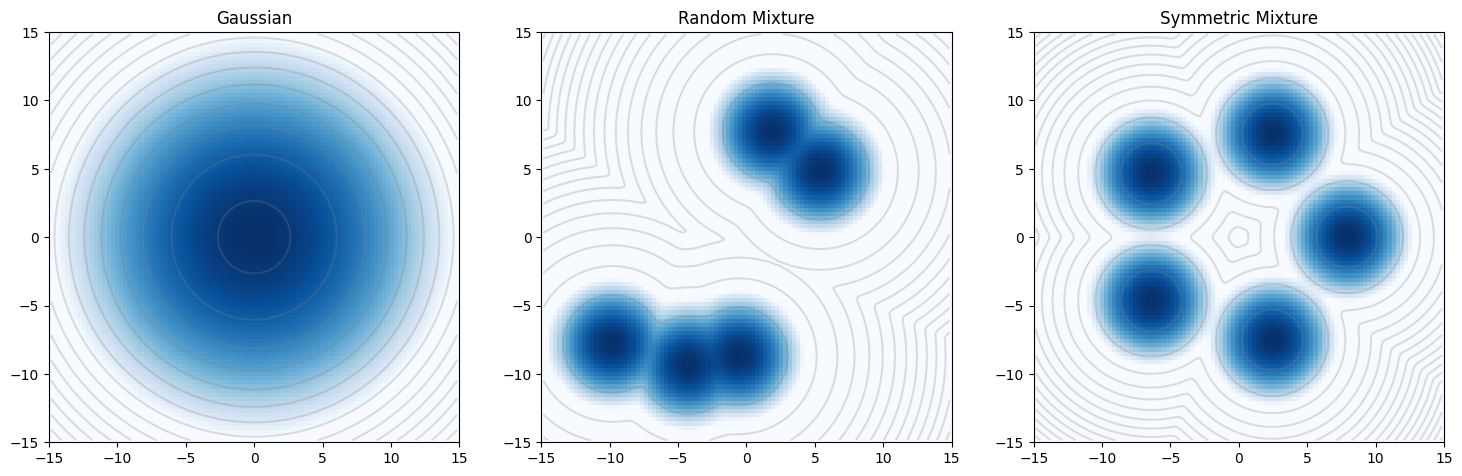

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Visualize densities
densities = {
    "Gaussian": Gaussian(mean=torch.zeros(2), cov=10 * torch.eye(2)).to(device),
    "Random Mixture": GaussianMixture.random_2D(nmodes=5, std=1.0, scale=20.0, seed=3.0).to(device),
    "Symmetric Mixture": GaussianMixture.symmetric_2D(nmodes=5, std=1.0, scale=8.0).to(device),
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
bins = 100
scale = 15
for idx, (name, density) in enumerate(densities.items()):
    ax = axes[idx]
    ax.set_title(name)
    imshow_density(density, bins, scale, ax, vmin=-15, cmap=plt.get_cmap('Blues'))
    contour_density(density, bins, scale, ax, colors='grey', linestyles='solid', alpha=0.25, levels=20)
plt.show()